## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
ds = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
ds


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

dsMean = pd.DataFrame(ds.groupby("Drug Regimen").mean())
dsMean = dsMean['Tumor Volume (mm3)']
dsMedian = pd.DataFrame(ds.groupby("Drug Regimen").median())
dsMedian = dsMedian['Tumor Volume (mm3)']
dsVar = pd.DataFrame(ds.groupby("Drug Regimen").var())
dsVar = dsVar['Tumor Volume (mm3)']
dsStd = pd.DataFrame(ds.groupby("Drug Regimen").std())
dsStd = dsStd['Tumor Volume (mm3)']
dsSem = pd.DataFrame(ds.groupby("Drug Regimen").sem())
dsSem = dsSem['Tumor Volume (mm3)']

dsStats = pd.DataFrame([dsMean,dsMedian,dsVar,dsStd,dsSem],index=['mean','Median','Var','Std','SEM'])

dsStats





Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.322552,40.216745,54.233149,53.236507
Median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.854632,40.673236,52.431737,51.818479
Var,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,42.351070,23.486704,59.450562,48.533355
Std,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.507770,4.846308,7.710419,6.966589
SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.512884,0.320955,0.573111,0.516398


## Bar plots

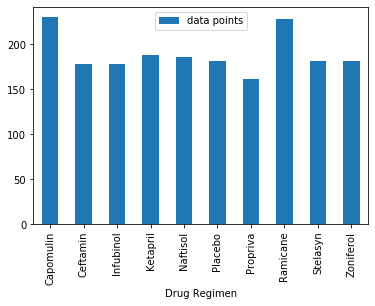

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
dsCount = ds.groupby("Drug Regimen").count()
dsCount['data points'] = dsCount['Mouse ID']
ax = dsCount.plot.bar(y = "data points")


Text(0.5, 1.0, 'Data Points by Drug Regimen')

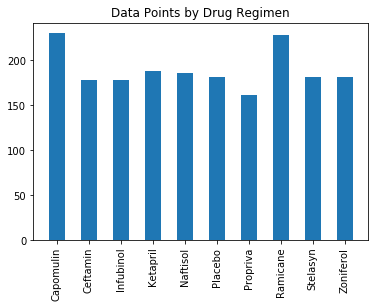

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
labels = dsCount.index.tolist()
#print(labels)

plt.bar(labels, dsCount['Mouse ID'], width = 0.5)
plt.xticks(rotation=90)
plt.title('Data Points by Drug Regimen')



## Pie plots

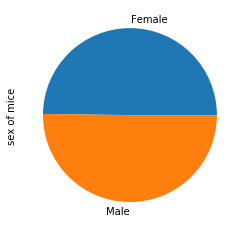

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
SexCount = mouse_metadata.groupby("Sex").count()
SexCount['sex of mice'] = SexCount['Mouse ID']

#print(SexCount)
plot = SexCount.plot.pie(y='sex of mice', legend=False)
plot




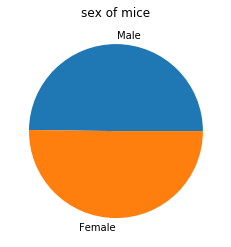

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots()


ax1.pie(SexCount['sex of mice'],labels = ('Male','Female'))
ax1.set(title = "sex of mice")
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Quartiles, outliers and boxplots

In [7]:


# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

finalds = ds[ds['Timepoint']==45]
#finalds = finalds[finalds['Drug Regimen'].isin(['Capomulin', 'Ramicane' ,'Infubinol' , 'Ceftamin'])]
print(finalds)

finaldCap = finalds[ds['Drug Regimen']=='Capomulin']

finaldRam = finalds[ds['Drug Regimen']=='Ramicane']



finaldInf = finalds[ds['Drug Regimen']=='Infubinol']

print(finaldInf)


finaldCef = finalds[ds['Drug Regimen']=='Ceftamin']




quartilesCap = finaldCap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartilesRam = finaldRam['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartilesInf = finaldInf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartilesCef = finaldCef['Tumor Volume (mm3)'].quantile([.25,.5,.75])

lowerqCap = quartilesCap[0.25]
lowerqRam = quartilesRam[0.25]
lowerqInf = quartilesInf[0.25]
lowerqCef = quartilesCef[0.25]

upperqCap = quartilesCap[0.75]
upperqRam = quartilesRam[0.75]
upperqInf = quartilesInf[0.75]
upperqCef = quartilesCef[0.75]

iqrCap = upperqCap-lowerqCap
iqrRam = upperqRam-lowerqRam
iqrInf = upperqInf-lowerqInf
iqrCef = upperqCef-lowerqCef


print(f"The interquartile range of Capomulin is: {iqrCap}")
print(f"The interquartile range of Ramican is: {iqrRam}")
print(f"The interquartile range of Infubinol is: {iqrInf}")
print(f"The interquartile range of Ceftamin is: {iqrCef}")



lowerBoundCap = lowerqCap - (1.5*iqrCap)
lowerBoundRam = lowerqRam - (1.5*iqrRam)
lowerBoundInf = lowerqInf - (1.5*iqrInf)
lowerBoundCef = lowerqCef - (1.5*iqrCef)

upperBoundCap = upperqCap + (1.5*iqrCap)
upperBoundRam = upperqRam + (1.5*iqrRam)
upperBoundInf = upperqInf + (1.5*iqrInf)
upperBoundCef = upperqCef + (1.5*iqrCef)


print(f"Capomulin values below {lowerBoundCap} could be outliers.")
print(f"Ramican values below {lowerBoundRam} could be outliers.")
print(f"Infubinol values below {lowerBoundInf} could be outliers.")
print(f"Ceftamin values below {lowerBoundCef} could be outliers.")

print(f"Capomulin values above {upperBoundCap} could be outliers.")
print(f"Ramican values above {upperBoundRam} could be outliers.")
print(f"Infubinol values above {upperBoundInf} could be outliers.")
print(f"Ceftamin values above {upperBoundCef} could be outliers.")



outliersCap = []
for value in finaldCap['Tumor Volume (mm3)'] :
        if value > upperBoundCap + 1.5*iqrCap or value < lowerBoundCap - 1.5*iqrCap:
            outliersCap.append(value)

print(outliersCap)
if not outliersCap:
  print("No outliers in Capomulin values")
else:
 print("outliers in Capomulin values")

outliersRam = []
for value in finaldRam['Tumor Volume (mm3)'] :
        if value > upperBoundRam + 1.5*iqrRam or value < lowerBoundRam - 1.5*iqrRam:
            outliersRam.append(value)

 
print(outliersRam)
if not outliersRam:
  print("No outliers in Ramican values")
else:
 print("outliers in Ramican values")

outliersInf = []
for value in finaldInf['Tumor Volume (mm3)'] :
        if value > upperBoundInf + 1.5*iqrInf or value < lowerBoundInf - 1.5*iqrInf:
            outliersInf.append(value)

print(outliersInf)

if not outliersInf:
  print("No outliers in Infubinol values")
else:
 print("outliers in Infubinol values")

outliersCef = []
for value in finaldCef['Tumor Volume (mm3)'] :
        if value > upperBoundCef + 1.5*iqrCef or value < lowerBoundCef - 1.5*iqrCef:
            outliersCef.append(value)

print(outliersCef) 
if not outliersCef:
  print("No outliers in Ceftamin values")
else:
 print("Outliers in Ceftamin values")


     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9        k403     Ramicane    Male          21          16         45   
19       s185    Capomulin  Female           3          17         45   
29       x401    Capomulin  Female          16          15         45   
39       m601    Capomulin    Male          22          17         45   
49       g791     Ramicane    Male          11          16         45   
...       ...          ...     ...         ...         ...        ...   
1845     y769     Ceftamin  Female           6          27         45   
1855     y865     Ceftamin    Male          23          26         45   
1872     z581    Infubinol  Female          24          25         45   
1882     z795     Naftisol  Female          13          29         45   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
9              22.050126                 1  
19             23.343598         

C:\Users\seanw\Anaconda333\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\seanw\Anaconda333\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\seanw\Anaconda333\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\seanw\Anaconda333\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


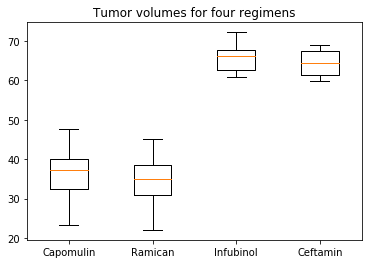

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#finaldCap
CapVols = finaldCap['Tumor Volume (mm3)'].tolist()
RamVols = finaldRam['Tumor Volume (mm3)'].tolist()
InfVols = finaldInf['Tumor Volume (mm3)'].tolist()
CefVols = finaldCef['Tumor Volume (mm3)'].tolist()

#finaldAll.boxplot('Tumor Volume (mm3)')

data = [CapVols, RamVols, InfVols , CefVols]
fig7, ax7 = plt.subplots()
ax7.set_title('Tumor volumes for four regimens')
ax7.boxplot(data)
ax7.set_xticklabels(['Capomulin', 'Ramican', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and scatter plots

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14 

Text(0, 0.5, 'Tumor Volums (mm3)')

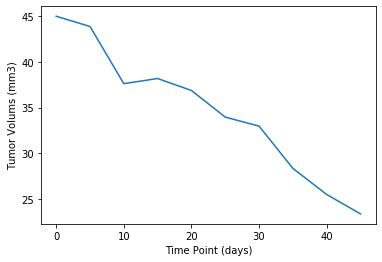

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


#print(CapVols)
mouseVals = ds[ds['Drug Regimen']=='Capomulin']
mouseVals = mouseVals[mouseVals['Mouse ID'] == 's185']
print(mouseVals)
#plt.plot(mouseVals)

mouseTV = mouseVals['Tumor Volume (mm3)'].tolist()
mouseTime = mouseVals['Timepoint'].tolist()

plt.plot(mouseTime,mouseTV)
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('results for mouse s185')


In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen